<a href="https://colab.research.google.com/github/naanadr/face_detection_projects/blob/master/face_detection_tdc_recife/face_detection_tdc_recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/naanadr/face_detection_projects.git

Cloning into 'face_detection_projects'...
remote: Enumerating objects: 597, done.
remote: Counting objects: 100% (597/597), done.
remote: Compressing objects: 100% (547/547), done.
remote: Total 2229 (delta 50), reused 557 (delta 19), pack-reused 1632
Receiving objects: 100% (2229/2229), 189.52 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking out files: 100% (643/643), done.


In [4]:
cd face_detection_projects/face_detection_tdc_recife/

/content/face_detection_projects/face_detection_tdc_recife


# Imports

In [0]:
import collections
import cv2
import dlib
from imutils import face_utils
from matplotlib import pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow

# Códigos!!!


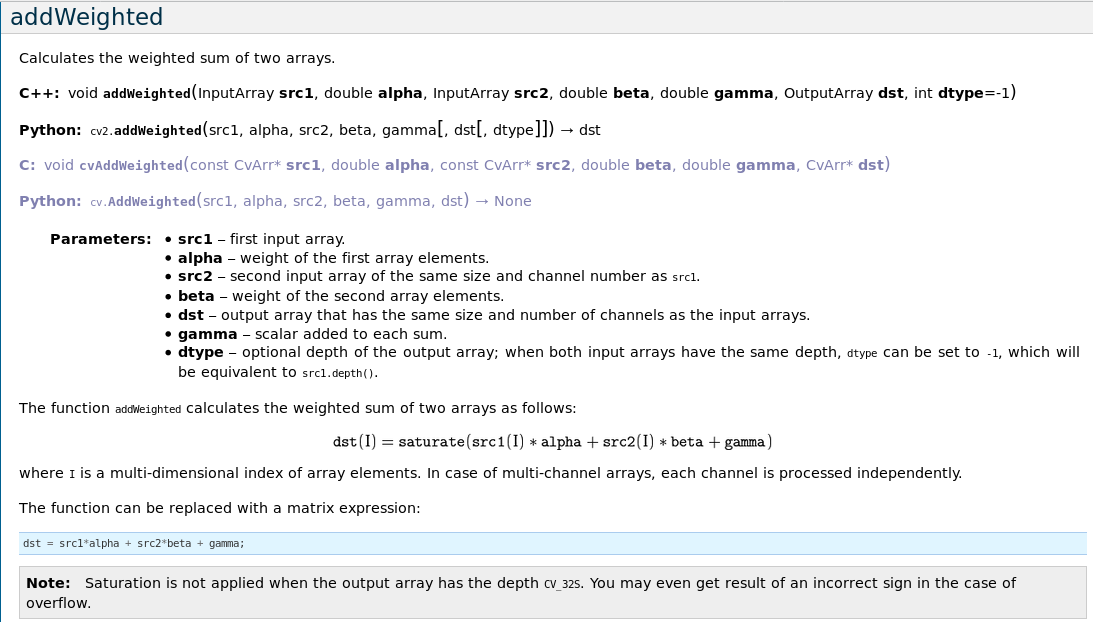

In [6]:
addWeighted = cv2.imread('stickers/addWeighted.png')
cv2_imshow(addWeighted)

## Helpers


In [0]:
FACIAL_LANDMARKS_IDXS = collections.OrderedDict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
])

In [0]:
def visualize_facial_landmarks(image, shape, colors, alpha):
  overlay = image.copy()
  output = image.copy()

  if colors is None:
    colors = [(168, 100, 168), (79, 76, 240), (230, 159, 23),
              (10, 10, 252), (10, 10, 252),
              (163, 38, 32), (180, 42, 220)]

  for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
    (j, k) = FACIAL_LANDMARKS_IDXS[name]
    pts = shape[j:k]

    if name == "jaw":
      for l in range(1, len(pts)):
        ptA = tuple(pts[l - 1])
        ptB = tuple(pts[l])
        cv2.line(overlay, ptA, ptB, colors[i], 2)
    else:
      hull = cv2.convexHull(pts)
      cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

  return output


In [0]:
def facil_landmarks(image=None, predictor=None, detector=None,
                    colors=None, alpha=0.75):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 1)

  for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)  
  
  return visualize_facial_landmarks(image, shape, colors, alpha)
  

In [0]:
def get_coordinates(image, region, detector, predictor):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  rects = detector(gray, 1)
  pts = []

  for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)  
    
    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
      if name == region:
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts.append(shape[j:k])

  return pts


In [0]:
def face_detection(frame, detector):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 1)
  
  output = frame.copy()

  if len(rects) > 0:
    cv2.putText(output, "Rostos detectados {}".format(len(rects)), (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    for rect in rects:
      (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
      cv2.rectangle(output, (bX, bY), (bX + bW, bY + bH),
                    (0, 255, 0), 2)

  return output
  

In [0]:
def draw_line(frame, points):
  output = frame.copy()
  
  for index, item in enumerate(points): 
      if index == len(points) -1:
          break
      cv2.line(output, item, points[index + 1], [0, 255, 0], 2) 
  
  return output

In [0]:
def landmarks_draw(image, detector, predictor):
  frame = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  rects = detector(gray, 1)

  if len(rects) > 0:
    for rect in rects:
      points = []
  
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
  
      for (i, (x, y)) in enumerate(shape):
        if i < 17:
          points.append((x, y))
      
      frame = draw_line(frame, points)
  
  return frame

In [0]:
def landmarks_detection(image, detector, predictor):
  frame = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  rects = detector(gray, 1)

  if len(rects) > 0:
    cv2.putText(frame, "Rostos detectados {}".format(len(rects)), (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    for rect in rects:
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
  
      for (i, (x, y)) in enumerate(shape):
        cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
        cv2.putText(frame, str(i + 1), (x - 10, y - 10),
          cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)

  return frame

## Dlib detecção de rosto

Preparativos...


In [0]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('helpers/'
                                 'shape_predictor_68_face_landmarks.dat')

## Começando as doideiras

(644, 774, 3)
(451, 542, 3)


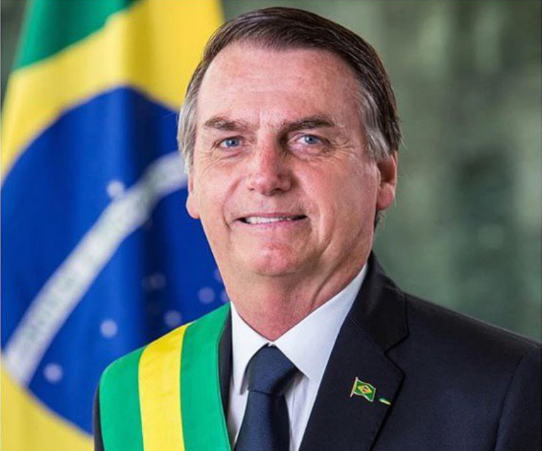

In [16]:
image_01 = cv2.imread('persons/bolsonaro.png')

print(image_01.shape)
image_01 = cv2.resize(image_01, None, fx=0.7, fy=0.7)
print(image_01.shape) 

cv2_imshow(image_01)

### Captura o rosto

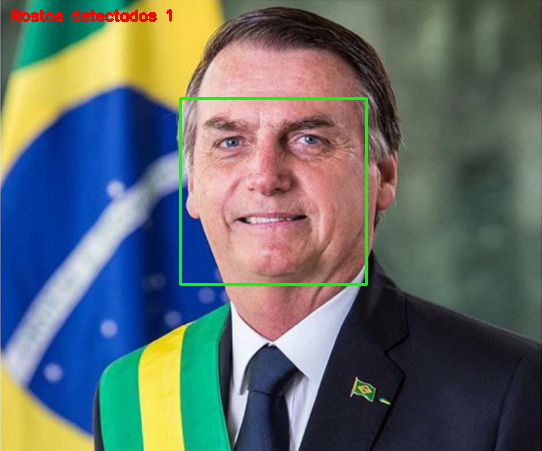

In [17]:
cv2_imshow(face_detection(image_01, detector))

### Será que continua capturando o rosto se a imagem estiver alterada?

In [18]:
kernel = np.ones((7, 7),np.float32)/25
result_2d_filter = cv2.filter2D(image_01,-1,kernel)

cv2_imshow(result_2d_filter)

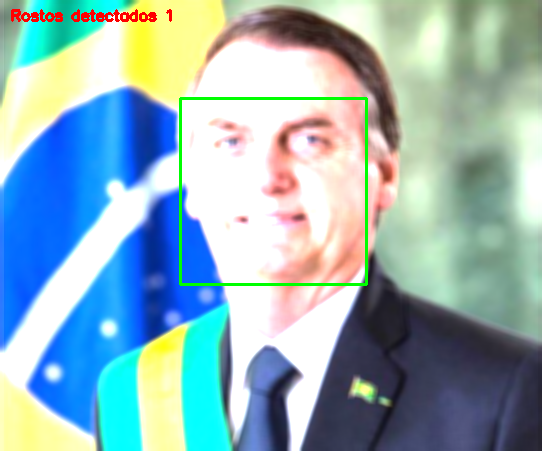

In [19]:
cv2_imshow(face_detection(result_2d_filter, detector))

In [20]:
rows, cols, _ = image_01.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 1)
rotate_image_01 = cv2.warpAffine(image_01,M,(cols,rows))

cv2_imshow(rotate_image_01)

In [21]:
cv2_imshow(face_detection(rotate_image_01, detector))


### E se tiver mais de um rosto?

In [22]:
image_02 = cv2.imread('persons/bolsonaro_02.jpg')
  
cv2_imshow(image_02)

### Será que ele detecta mesmo todos os rostos?


In [23]:
cv2_imshow(face_detection(image_02, detector))

## Pontos de interesse do rosto



![alt text](https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg)


## Vamos ver esses pontos nas imagens

In [24]:
cv2_imshow(landmarks_detection(image_02, detector, predictor))

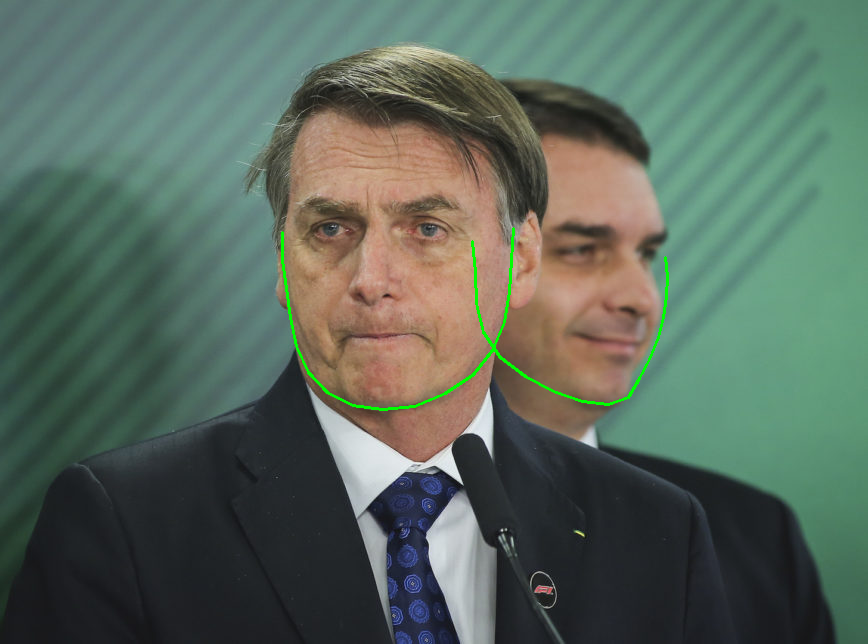

In [25]:
cv2_imshow(landmarks_draw(image_02, detector, predictor))

## Regiões de interesse do rosto

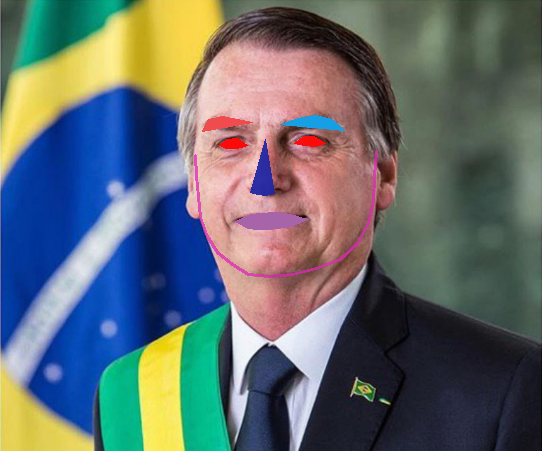

In [26]:
	cv2_imshow(facil_landmarks(image_01, predictor, detector))

### Vamos brincar um pouco... ou tentar.

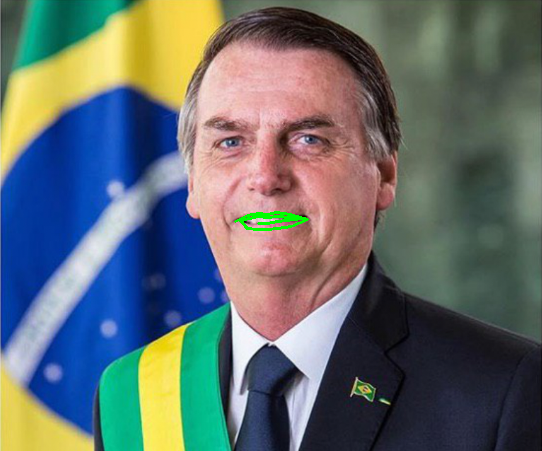

In [83]:
overlay = image_01.copy()
pts = get_coordinates(image_01, 'mouth', detector, predictor)[0]

for l in range(1, len(pts)):
  ptA = tuple(pts[l - 1])
  ptB = tuple(pts[l])
  cv2.line(overlay, ptA, ptB, (0, 255, 0), 2)

cv2_imshow(overlay)

### Ops... Vamos tentar de novo...

In [150]:
image_01 = cv2.imread('persons/bolsonaro.png')
overlay = image_01.copy()
pts = get_coordinates(image_01, 'mouth', detector, predictor)[0]

ptA = tuple(pts[0])  # Canto esquerdo da boca
ptB = tuple(pts[6])  # Canto direito da boca

ptC = tuple(pts[3])  # Canto superior da boca
ptD = tuple(pts[9])  # Canto inferior da boca

h = abs(ptC[1] - ptD[1])
w = abs(ptA[0] - ptB[0])

# img[y:y+h, x:x+w]
cv2_imshow(overlay[ptA[1]: ptA[1] + h, ptA[0]: ptA[0] + w])

In [151]:
offset = 10

# img[y:y+h, x:x+w]
cv2_imshow(overlay[ptA[1] - offset: ptA[1] + h, ptA[0] - offset: ptA[0] + w + offset])

### Que tal um pouco de barba?

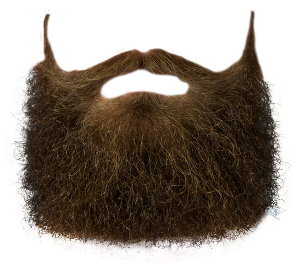

In [146]:
stickers = cv2.imread('stickers/barba_02.png', -1)
watermark = cv2.resize(stickers, None, fx=0.4, fy=0.4)
# watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2BGRA)

cv2_imshow(watermark)

In [210]:
frame = cv2.cvtColor(image_01, cv2.COLOR_BGR2BGRA)
frame_h, frame_w, frame_c = frame.shape

# overlay with 4 channels BGR and Alpha
overlay = frame.copy()
watermark_h, watermark_w, watermark_c = watermark.shape

# replace overlay pixels with watermark pixel values
for i in range(0, watermark_h):
  for j in range(0, watermark_w):
    if watermark[i,j][3] != 0:
      w_offset = ptB[0] - w - 100
      h_offset = ptD[1] - 90
      overlay[h_offset + i, w_offset + j] = watermark[i, j]

cv2_imshow(overlay)

### Vamos usar outra imagem...

(512, 768, 3)


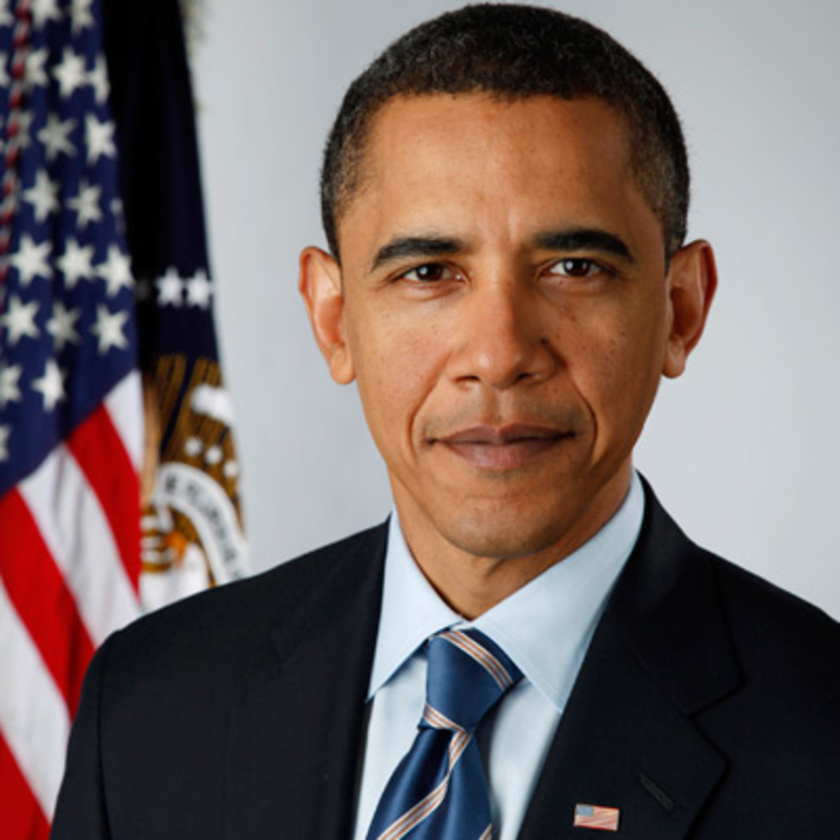

In [0]:
new_image = cv2.imread('persons/barack_obama.jpg')

print(image.shape)
new_image = cv2.resize(new_image, None, fx=0.7, fy=0.7)
  
cv2_imshow(new_image)

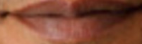

In [0]:
canto_esquerdo = get_coordinates(new_image, 48)
canto_superior = get_coordinates(new_image, 51)
canto_inferior = get_coordinates(new_image, 57)
canto_direito = get_coordinates(new_image, 54)

x1, y1 = canto_esquerdo[0]
x2, y2 = canto_superior[0]
x3, y3 = canto_inferior[0]
x4, y4 = canto_direito[0]

width = x4 - x1 + 4

y = min(y1, y2, y3, y4) - 4
x1 = x1 - 4
height = max(y1, y2, y3, y4) - y + 4

cv2_imshow(new_image[y: y + height, x1: x1 + width])

In [0]:
stickers = cv2.imread('stickers/barba_02.png', -1)
watermark = cv2.resize(stickers, None, fx=0.6, fy=0.6)
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2BGRA)

cv2_imshow(watermark)

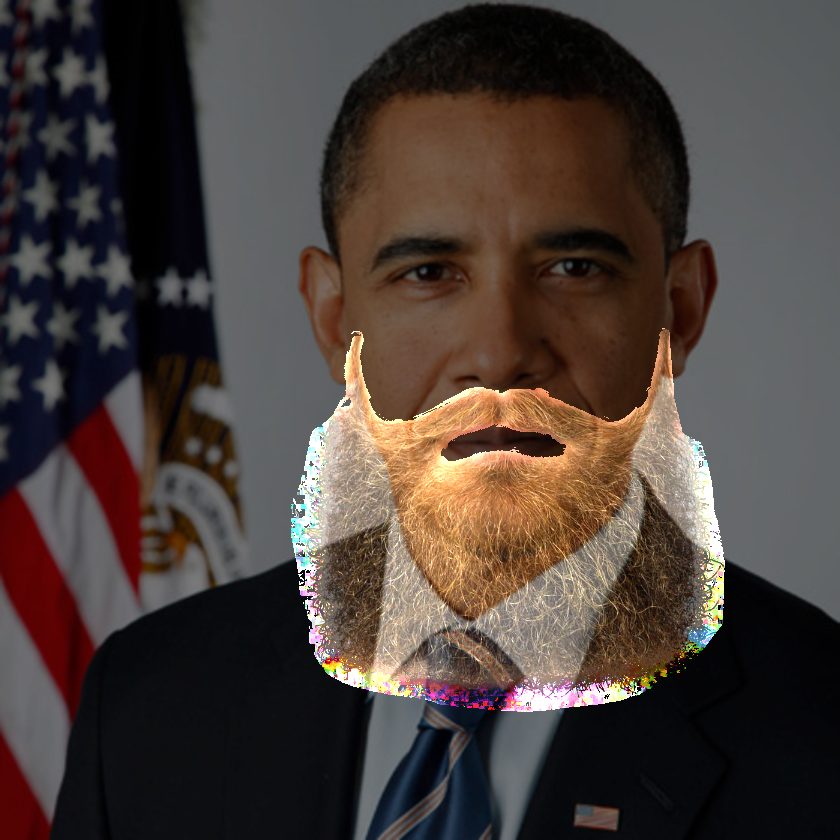

In [0]:
frame = cv2.cvtColor(new_image, cv2.COLOR_BGR2BGRA)
frame_h, frame_w, frame_c = frame.shape

# overlay with 4 channels BGR and Alpha
overlay = np.zeros((frame_h, frame_w, 4), dtype='uint8')
watermark_h, watermark_w, watermark_c = watermark.shape
# replace overlay pixels with watermark pixel values
for i in range(0, watermark_h):
  for j in range(0, watermark_w):
    if watermark[i,j][3] != 0:
      offset_h = 70
      
      w_offset = x1 - width 
      h_offset = y2 - height - offset_h
      overlay[h_offset + i, w_offset+ j] = watermark[i,j]

cv2.addWeighted(overlay, 1.5, frame, 0.5, 0, frame)

frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)

cv2_imshow(frame)